# **Course Name: Data Science Engineering Methods and Tools**

### Submitted by -
* Name - Nikita Gaurihar
* Nuid - 002980962
___________________________________________________________________________
 
## **Assignment 6** - Deep Learning with CNNs


### **Abstract** "*Image Classification - Weather Dataset*"
Deep learning is the new buzz word in the technology market. One of the reasons behind Deep Learning's success factor are the performance and results of Convolutional Neural networks. This project aims to classifiy the image dataset of five different weather classes with better accuracy and minimum loss using CNNs. We have developed 7 different models that consists of 1 base model and 6 models after performing hyper-parameter tuning. 


### **Dataset information**

Dataset contains 6 diorectories and 1 csv file.

Five folders for the images of five weather classes, such as -
1. Cloudy
2. Foggy
3. Shine
4. Rainy
5. Sunrise

Remaining 1 file and 1 folder consists of images of random weather class for the testing purpose -
1. alient_test
2. test.csv




# **1. Importing the required libraries and packages**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import tqdm as tqdm
import os
from os.path import join
import random
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn .preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt



In [2]:
# Importing the Keras libraries and packages

from tensorflow import keras
from keras.layers import Conv2D, Input, MaxPool2D,Flatten, Dense, Permute, GlobalAveragePooling2D
from keras.models import Model
import numpy as np
import pickle
import keras
import cv2
import sys
import dlib
import os.path
from keras.models import Sequential
import pickle
import numpy as np
import cv2
import os
from keras.layers import Dropout

# **2. Downloading data from Kaggle -**

### **Step a:  Loading the data directory from Kaggle using API token-**

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "nikitagaurihar" # username from the json file
os.environ['KAGGLE_KEY'] = "18f1591df0460baf935a1b18eb7a8620" # key from the json file

In [4]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 94% 126M/134M [00:01<00:00, 111MB/s]
100% 134M/134M [00:01<00:00, 120MB/s]


### **Step b:  Mount google drive:**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Unzip training data
from zipfile import ZipFile
zipFile = "/content/drive/MyDrive/Data Science Datasets/DL Project - Kaggle_WeatherDataset/archive.zip"
with ZipFile(zipFile, 'r') as zip:
  zip.extractall()
  print('All files were extracted successfully!!')

All files were extracted successfully!!


### **Step c: Saving extracted file in new folder - 'dataset'**

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Get all the paths
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)


['cloudy', 'test.csv', 'foggy', 'rainy', 'alien_test', 'sunrise', 'shine']


In [9]:
path, dirs, files = next(os.walk("/content/dataset"))
file_count = len(files)
print(file_count)

1


## **3. Splitting the Dataset for training and testing the model**

### Preparing the folder structure and mapping the image classes to the respective train and validation folders.

### **Folder Structure:**

weather-data (Base Directory)

1. Training Dataset

---------------> cloudy

---------------> foggy

---------------> rainy

---------------> shine

---------------> sunrise

2. Validation Dataset

---------------> cloudy

---------------> foggy

---------------> rainy

---------------> shine

---------------> sunrise

In [10]:
# Make new base directory
original_dataset_dir = '/content/dataset'
base_dir = '/content/weather-data/'
os.mkdir(base_dir)

In [11]:
#create two folders (train and validation) - 
train_dir = os.path.join(base_dir, 'train')                                                                       # train data folder
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')                                                             # validation data folder
os.mkdir(validation_dir)

In [12]:
#Under train folder create five folders - cloud, foggy, rainy, shine, sunrise

train_cloud_dir = os.path.join(train_dir, 'cloudy')                                                                # train data folder--> folder for cloudy images 
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')                                                                 # train data folder--> folder for foggy images 
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')                                                                 # train data folder--> folder for rainy images 
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')                                                                 # train data folder--> folder for shine images 
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')                                                             # train data folder--> folder for sunrise images 
os.mkdir(train_sunrise_dir)

In [13]:
#Under validation folder create five folders - cloud, foggy, rainy, shine, sunrise

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')                                                      # validation data folder--> folder for cloudy images
os.mkdir(validation_cloud_dir) 

validation_foggy_dir = os.path.join(validation_dir, 'foggy')                                                       # validation data folder--> folder for foggy images
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')                                                       # validation data folder--> folder for rainy images
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')                                                       # validation data folder--> folder for shine images
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')                                                   # validation data folder--> folder for sunrise images
os.mkdir(validation_sunrise_dir)

In [14]:
# Setting the training and validation dataset path

train_dir = "/train/"
test_dir = base_dir + "alien_test/"

training_set_path = '/content/weather-data/train'
validation_set_path = '/content/weather-data/train'

#Setting the path for image classes in Training and Validation Folders

train_cloudy_images = '/content/weather-data/train/cloudy'
train_foggy_images = '/content/weather-data/train/foggy'
train_rainy_images = '/content/weather-data/train/rainy'
train_shine_images = '/content/weather-data/train/shine'
train_sunrise_images = '/content/weather-data/train/sunrise'

valid_cloudy_images = '/content/weather-data/validation/cloudy'
valid_foggy_images = '/content/weather-data/validation/foggy'
valid_rainy_images = '/content/weather-data/validation/rainy'
valid_shine_images = '/content/weather-data/validation/shine'
valid_sunrise_images = '/content/weather-data/validation/sunrise'

**Created function 'split_data' as we have to split image data from 5 different folders -**

In [15]:
# Creating function to split the dataset - 
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
          files.append(filename)
        else:
          print(filename + " is zero length, so ignoring.")
  
    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]
        
        
    for filename in training_set:
      this_file = SOURCE + filename
      destination = TRAINING + filename
      copyfile(this_file, destination)

    for filename in valid_set:
      this_file = SOURCE + filename
      destination = VALIDATION + filename
      copyfile(this_file, destination)

In [16]:
CLOUDY_SOURCE_DIR = '/content/dataset/cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather-data/train/cloudy/'
VALID_CLOUDY_DIR = '/content/weather-data/validation/cloudy/'

FOGGY_SOURCE_DIR = '/content/dataset/foggy/'
TRAINING_FOGGY_DIR = '/content/weather-data/train/foggy/'
VALID_FOGGY_DIR = '/content/weather-data/validation/foggy/'

RAINY_SOURCE_DIR = '/content/dataset/rainy/'
TRAINING_RAINY_DIR = '/content/weather-data/train/rainy/'
VALID_RAINY_DIR = '/content/weather-data/validation/rainy/'

SHINE_SOURCE_DIR = '/content/dataset/shine/'
TRAINING_SHINE_DIR = '/content/weather-data/train/shine/'
VALID_SHINE_DIR = '/content/weather-data/validation/shine/'

SUNRISE_SOURCE_DIR = '/content/dataset/sunrise/'
TRAINING_SUNRISE_DIR = '/content/weather-data/train/sunrise/'
VALID_SUNRISE_DIR = '/content/weather-data/validation/sunrise/'

In [17]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

**Number of images in each folder can be seen here -**

In [18]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Training dataset for {} are: '.format(i)+str(len(os.listdir('/content/weather-data/train/'+i+'/'))))

Training dataset for cloudy are: 255
Training dataset for foggy are: 255
Training dataset for rainy are: 255
Training dataset for shine are: 212
Training dataset for sunrise are: 297


**Showcasing the count of images in each folder of train and validation dataset using plots -**

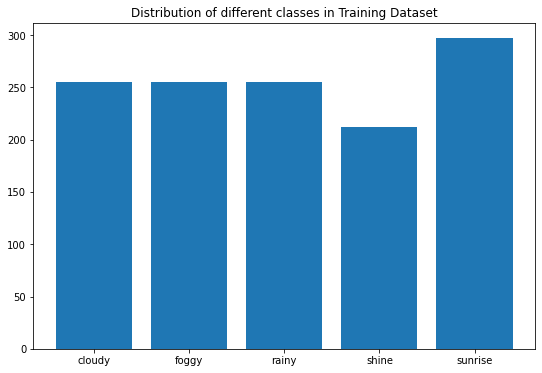

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

classes = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
imageCount = {}
for i in classes:
    nimages = len(os.listdir('/content/weather-data/train/'+i+'/'))
    imageCount[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(imageCount)), list(imageCount.values()), align='center')
plt.xticks(range(len(imageCount)), list(imageCount.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [20]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Validation dataset for {} are: '.format(i)+str(len(os.listdir('/content/weather-data/validation/'+i+'/'))))

Validation dataset for cloudy are: 45
Validation dataset for foggy are: 45
Validation dataset for rainy are: 45
Validation dataset for shine are: 38
Validation dataset for sunrise are: 53


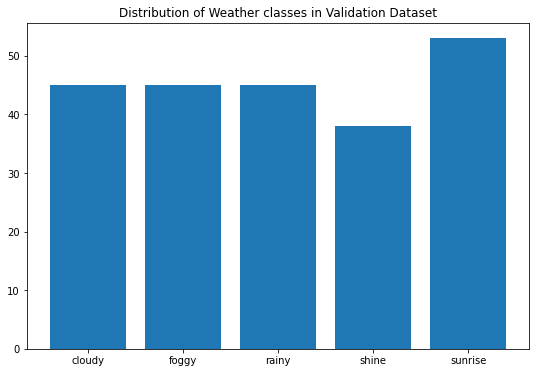

In [21]:
classes = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
imageCount = {}
for i in classes:
    nimages = len(os.listdir('/content/weather-data/validation/'+i+'/'))
    imageCount[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(imageCount)), list(imageCount.values()), align='center')
plt.xticks(range(len(imageCount)), list(imageCount.keys()))
plt.title('Distribution of Weather classes in Validation Dataset')
plt.show()

In [22]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims

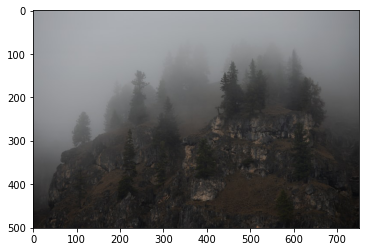

In [24]:
# load the image
testimage = load_img('/content/weather-data/validation/foggy/foggy122.jpg')

plt.imshow(testimage)

In [25]:
train_dir = '/content/weather-data/train'

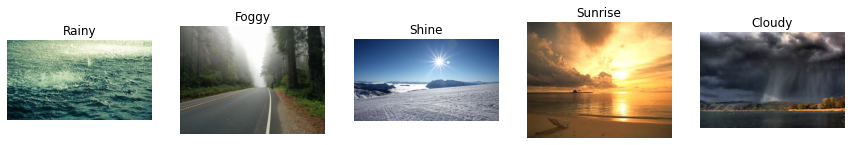

In [26]:
# Displaying random image from the dataset

fig, ax = plt.subplots(1, 5, figsize=(15, 10))

sample_paper = random.choice(os.listdir(train_dir + '/rainy'))
image = load_img(train_dir + "/rainy/" + sample_paper)
ax[0].imshow(image)
ax[0].set_title("Rainy")
ax[0].axis("Off")

sample_rock = random.choice(os.listdir(train_dir + '/foggy'))
image = load_img(train_dir + "/foggy/" + sample_rock)
ax[1].imshow(image)
ax[1].set_title("Foggy")
ax[1].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + '/shine'))
image = load_img(train_dir + "/shine/" + sample_scissor)
ax[2].imshow(image)
ax[2].set_title("Shine")
ax[2].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + '/sunrise'))
image = load_img(train_dir + "/sunrise/" + sample_scissor)
ax[3].imshow(image)
ax[3].set_title("Sunrise")
ax[3].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + '/cloudy'))
image = load_img(train_dir + "/cloudy/" + sample_scissor)
ax[4].imshow(image)
ax[4].set_title("Cloudy")
ax[4].axis("Off")


plt.show()

## **4. Deep Learning with Data Augumentation:** 

### **Part 1 - Data Preprocessing -**

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [28]:
img_width=256; img_height=256
batch_size=16

**Interpretation:**

1. We have kept batch size = 16
2. count of epochs = 30

In [29]:
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


**Interpretation**: Since our dataset has 5 different labels, we have taken mode as 'categorical'.

In [30]:
VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


**Interpretation**: Since our dataset has 5 different labels, we have taken mode as 'categorical'.

In [31]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model1 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

**Interpretation:**

We are saving our best model file here on drive.

### Part 2 - Model Building

# **Model 1:**Base Model

In [32]:
# Step 1 - Convolution
model = Sequential([
                    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),                # input layer
                    MaxPooling2D(2, 2),                                                                           # pooling layer
                    
                    Conv2D(32, (3, 3), activation='relu'),                                                        # hidden layer 1
                    MaxPooling2D(2, 2),                                                                           # pooling layer
                    
                    Conv2D(64, (3, 3), activation='relu'),                                                        # hidden layer 2
                    Conv2D(64, (3, 3), activation='relu'),                                                        
                    MaxPooling2D(2, 2),                                                                           # pooling layer
                   
                    Conv2D(128, (3, 3), activation='relu'),                                                       #hidden layer 3
                    Conv2D(128, (3, 3), activation='relu'),
                    MaxPooling2D(2, 2),                                                                           # pooling layer
                   
                    Conv2D(256, (3, 3), activation='relu'),                                                       # hidden layer 4
                    Conv2D(256, (3, 3), activation='relu'),
                    Conv2D(256, (3, 3), activation='relu'),
                    MaxPooling2D(2, 2),                                                                           # pooling layer
                    
                    Flatten(),                                                                                    #flattening layer
                    
                    Dense(512, activation='relu'),                                                                
                    Dense(512, activation='relu'),
                    Dense(5, activation='softmax')                                                                # full connection with 5 outputclasses
])

model.summary();


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

**Interpretation:** We can see that the output shows 5 output classes in the last 'dense_2' layer. That means,our model knows how to classify the images now.

In [33]:
# Compiling the CNN, model optimisers
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [34]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model1]
                              )

Epoch 1/30
80/80 [==============================] - 35s 325ms/step - loss: 1.6059 - accuracy: 0.2229 - val_loss: 1.7544 - val_accuracy: 0.1681
Epoch 2/30
80/80 [==============================] - 26s 323ms/step - loss: 1.3140 - accuracy: 0.4325 - val_loss: 1.1689 - val_accuracy: 0.5442
Epoch 3/30
80/80 [==============================] - 26s 322ms/step - loss: 1.1857 - accuracy: 0.5000 - val_loss: 1.0746 - val_accuracy: 0.4912
Epoch 4/30
80/80 [==============================] - 26s 325ms/step - loss: 0.9964 - accuracy: 0.5330 - val_loss: 1.0388 - val_accuracy: 0.5442
Epoch 5/30
80/80 [==============================] - 26s 324ms/step - loss: 0.9661 - accuracy: 0.5345 - val_loss: 0.9932 - val_accuracy: 0.5664
Epoch 6/30
80/80 [==============================] - 26s 324ms/step - loss: 0.9633 - accuracy: 0.5604 - val_loss: 0.9905 - val_accuracy: 0.5354
Epoch 7/30
80/80 [==============================] - 26s 320ms/step - loss: 0.9204 - accuracy: 0.5722 - val_loss: 1.0380 - val_accuracy: 0.5398

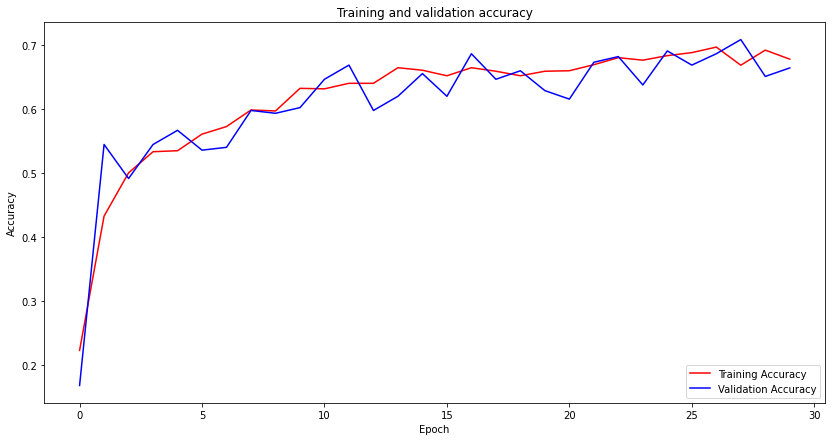

In [37]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

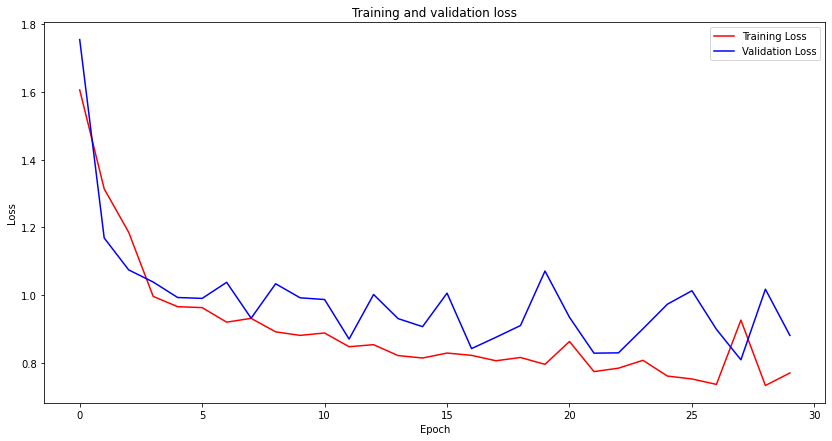

In [38]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

**Interpretation:** From the above graphs, we can interpret that- 
 - training accuracy = 0.6774
 - validation accuracy = 0.6637
 - training loss = 0.7704
 - validation loss =  0.8813

 This shows that the training model were trained better than validation as training accuracy is higher and training loss is lower.

In [39]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

### Checking performance on Test Data (Out of the sample)

In [40]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [41]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 0s 3ms/step
[1 2 3 3 1 2 2 2 0 1 4 3 2 1 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [42]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [43]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

### **Classification report for base model is as follows-**

In [44]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[0, 1, 1, 2, 0],
       [1, 3, 4, 1, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])

In [45]:
train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

In [46]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

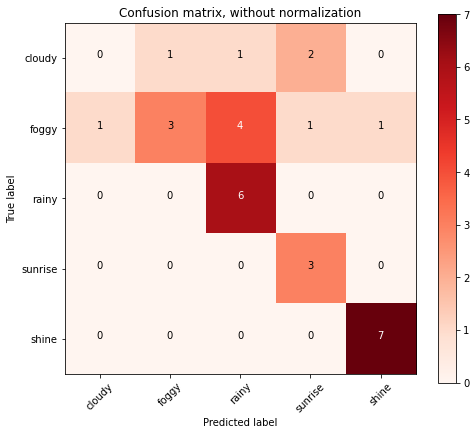

In [47]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

**Interpretation**:

From confusion matrix, we can interpret how many true positives did the model predict correctly for the 5 different classes.

- Cloudy - 0 out of 4 images were classified correctly.
- Foggy -  3 out of 10 images were classified correctly.
- rainy -  6 out of 6 images were classified correctly.
- sunrise -  3 out of 3 images were classified correctly.
- shine - 7 out of 7 images were classified correctly.


# **PART B - ACTIVATION FUNCTION:**

**Model 2** : In this model, we have changed the activation funtion of base model from **'reLu' to 'eLu'**, to check the model performance

### **Data Preprocessing -**

In [48]:
img_width=256; img_height=256
batch_size=16

# **Interpretation:**
* We have kept batch size = 16
* count of epochs = 30

In [49]:
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


**Interpretation**: Since our dataset has 5 different labels, we have taken mode as 'categorical'.

In [50]:
VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


**Interpretation**: Since our dataset has 5 different labels, we have taken mode as 'categorical'.

In [51]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_elu_aug_best_weights.h5'
best_model2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

**Interpretation:**

We are saving our best model file here on drive.

### **We have changed the activation function from ReLu to eLu here, again running the model to check the model accuracy -**

In [52]:
model_activation = Sequential([
                               Conv2D(16, (3, 3), activation='elu', input_shape=(img_height, img_width, 3)), 
                               MaxPooling2D(2, 2),
                               
                               Conv2D(32, (3, 3), activation='elu'), 
                               MaxPooling2D(2, 2),
                               
                               Conv2D(64, (3, 3), activation='elu'),
                               Conv2D(64, (3, 3), activation='elu'),
                               MaxPooling2D(2, 2),
                               
                               Conv2D(128, (3, 3), activation='elu'),
                               Conv2D(128, (3, 3), activation='elu'),
                               MaxPooling2D(2, 2),
                               
                               Conv2D(256, (3, 3), activation='elu'),
                               Conv2D(256, (3, 3), activation='elu'),
                               Conv2D(256, (3, 3), activation='elu'),
                               MaxPooling2D(2, 2),
                               
                               Flatten(),
                               
                               Dense(512, activation='elu'),
                               Dense(512, activation='elu'),
                               Dense(5, activation='softmax')
])
model_activation.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 58, 58, 64)       


**Interpretation**: We can see that the output shows 5 output classes in the last 'dense_2' layer. That means,our model knows how to classify the images now.

In [53]:
model_activation.compile(optimizer='Adam', 
              loss='categorical_crossentropy',                                          # since its multiclass classification problem
              metrics =['accuracy'])

In [54]:
history_activation = model_activation.fit_generator(train_generator,
                                                    epochs=30,
                                                    verbose=1,
                                                    validation_data=validation_generator,
                                                    callbacks = [best_model2]
                                                    )

Epoch 1/30
80/80 [==============================] - 27s 327ms/step - loss: 2.9029 - accuracy: 0.4113 - val_loss: 0.9262 - val_accuracy: 0.5973
Epoch 2/30
80/80 [==============================] - 26s 326ms/step - loss: 1.0163 - accuracy: 0.6217 - val_loss: 0.8127 - val_accuracy: 0.6858
Epoch 3/30
80/80 [==============================] - 26s 324ms/step - loss: 0.8383 - accuracy: 0.6782 - val_loss: 0.7172 - val_accuracy: 0.7124
Epoch 4/30
80/80 [==============================] - 26s 321ms/step - loss: 0.8499 - accuracy: 0.6656 - val_loss: 0.9222 - val_accuracy: 0.6460
Epoch 5/30
80/80 [==============================] - 26s 323ms/step - loss: 0.8256 - accuracy: 0.6499 - val_loss: 0.8485 - val_accuracy: 0.6593
Epoch 6/30
80/80 [==============================] - 26s 330ms/step - loss: 0.8688 - accuracy: 0.6641 - val_loss: 1.0613 - val_accuracy: 0.6062
Epoch 7/30
80/80 [==============================] - 26s 328ms/step - loss: 0.8198 - accuracy: 0.6703 - val_loss: 0.9207 - val_accuracy: 0.6460

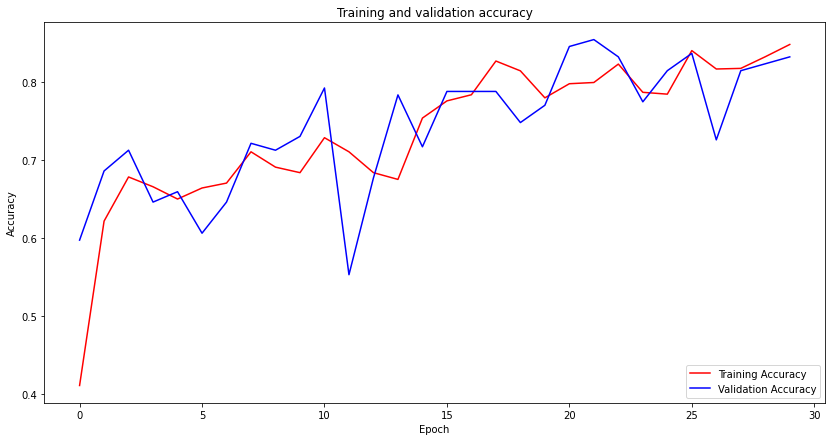

In [56]:
acc2=history_activation.history['accuracy']
val_acc2=history_activation.history['val_accuracy']
loss2=history_activation.history['loss']
val_loss2=history_activation.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc2, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc2, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

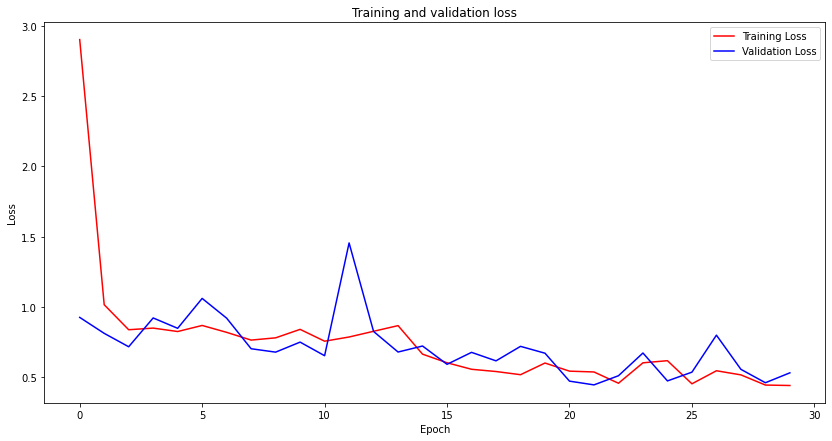

In [57]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss2, 'r', label="Training Loss")
plt.plot(epochs, val_loss2, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

**Interpretation:** From the above graphs, we can interpret that-

- training accuracy = 0.8477
 - validation accuracy = 0.8319
 - training loss = 0.4415
 - validation loss =  0.5317

 This shows that the training model were trained better than validation as training accuracy is higher and training loss is lower.


### **Checking performance on Test Data-**

In [58]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [59]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [60]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 0s 3ms/step
[1 2 3 3 1 2 2 2 0 1 4 3 2 1 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [62]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [63]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

### **Classification report for base model is as follows-**

In [64]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[0, 1, 1, 2, 0],
       [1, 3, 4, 1, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])

In [65]:
train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

In [66]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

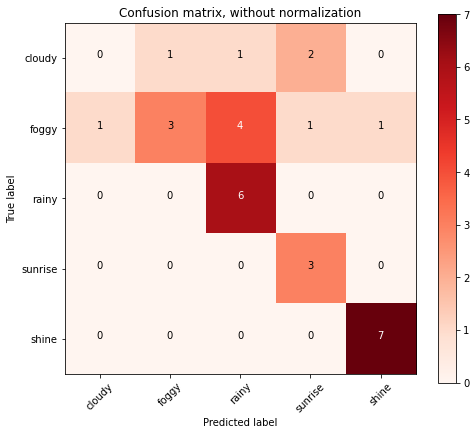

In [67]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()


**Interpretation:**

From confusion matrix, we can interpret how many true positives did the model predict correctly for the 5 different classes.

- Cloudy - 0 out of 4 images were classified correctly.
- Foggy -  3 out of 10 images were classified correctly.
- rainy -  6 out of 6 images were classified correctly.
- sunrise -  3 out of 3 images were classified correctly.
- shine - 7 out of 7 images were classified correctly.


# **PART C - COST FUNCTION:**

**Model 3** : In this model, we have changed the cost funtion of base model from 'categorical_crossentropy' to 'kullback_leibler_divergence', to check the model performance

In [68]:
img_width=256; img_height=256
batch_size=16

**Interpretation**:

* We have kept batch size = 16
* count of epochs = 30


In [69]:
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


**Interpretation**: Since our dataset has 5 different labels, we have taken mode as 'categorical'.

In [70]:
VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


**Interpretation**: Since our dataset has 5 different labels, we have taken mode as 'categorical'.

In [71]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_costfunction_aug_best_weights.h5'
best_model3 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

**Interpretation:**

We are saving our best model file here on drive.

We have changed the cost function from **'categorical_crossentropy' to 'kullback_leibler_divergence'** here, again running the model to check the model accuracy -


In [72]:
model_costf = Sequential([
                          Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), 
                          MaxPooling2D(2, 2),
                          
                          Conv2D(32, (3, 3), activation='relu'), 
                          MaxPooling2D(2, 2),
                          
                          Conv2D(64, (3, 3), activation='relu'),
                          Conv2D(64, (3, 3), activation='relu'),
                          MaxPooling2D(2, 2),
                          
                          Conv2D(128, (3, 3), activation='relu'),
                          Conv2D(128, (3, 3), activation='relu'),
                          MaxPooling2D(2, 2),
                          
                          Conv2D(256, (3, 3), activation='relu'),
                          Conv2D(256, (3, 3), activation='relu'),
                          Conv2D(256, (3, 3), activation='relu'),
                          MaxPooling2D(2, 2),
                          
                          Flatten(),
                          
                          Dense(512, activation='relu'),
                          Dense(512, activation='relu'),
                          Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

**Interpretation**: We can see that the output shows 5 output classes in the last 'dense_2' layer. That means,our model knows how to classify the images now.

In [73]:
model_costf.compile(optimizer='Adam',
                    loss='kullback_leibler_divergence', 
                    metrics =['accuracy'])

In [74]:
history_costf = model_costf.fit_generator(train_generator,
                                          epochs=30,
                                          verbose=1,
                                          validation_data=validation_generator,
                                          callbacks = [best_model3]
                                          )

Epoch 1/30
80/80 [==============================] - 27s 323ms/step - loss: 1.5972 - accuracy: 0.2135 - val_loss: 1.6058 - val_accuracy: 0.2345
Epoch 2/30
80/80 [==============================] - 26s 324ms/step - loss: 1.6420 - accuracy: 0.3108 - val_loss: 1.4762 - val_accuracy: 0.3142
Epoch 3/30
80/80 [==============================] - 26s 323ms/step - loss: 1.4601 - accuracy: 0.3273 - val_loss: 1.4057 - val_accuracy: 0.3850
Epoch 4/30
80/80 [==============================] - 26s 319ms/step - loss: 1.5065 - accuracy: 0.3658 - val_loss: 1.4338 - val_accuracy: 0.3230
Epoch 5/30
80/80 [==============================] - 26s 321ms/step - loss: 1.4332 - accuracy: 0.3768 - val_loss: 1.4149 - val_accuracy: 0.4248
Epoch 6/30
80/80 [==============================] - 26s 324ms/step - loss: 1.4189 - accuracy: 0.4882 - val_loss: 1.3708 - val_accuracy: 0.4027
Epoch 7/30
80/80 [==============================] - 26s 318ms/step - loss: 1.4758 - accuracy: 0.4223 - val_loss: 1.3929 - val_accuracy: 0.4248

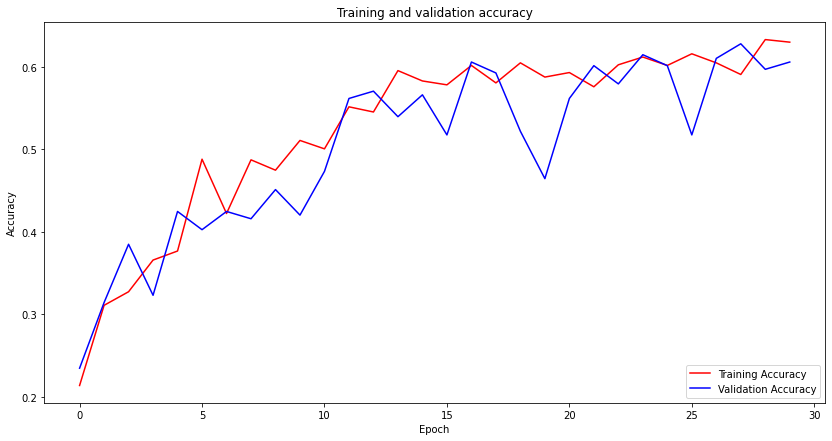

In [75]:
acc3=history_costf.history['accuracy']
val_acc3=history_costf.history['val_accuracy']
loss3=history_costf.history['loss']
val_loss3=history_costf.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc3, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc3, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

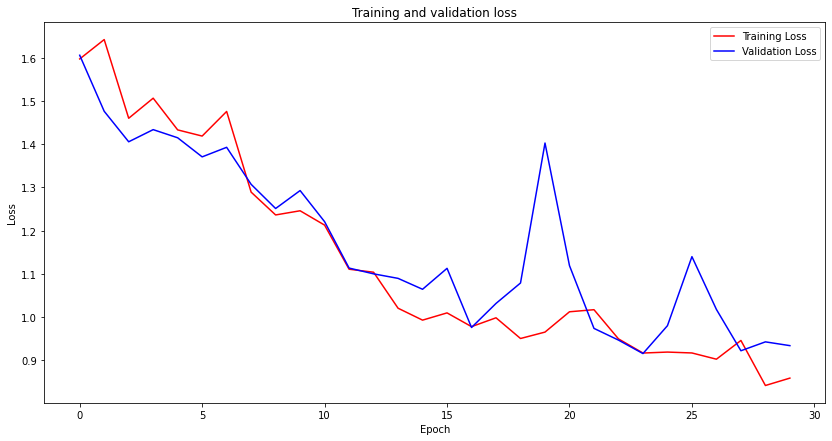

In [76]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss3, 'r', label="Training Loss")
plt.plot(epochs, val_loss3, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

**Interpretation:** From the above graphs, we can interpret that-

- training accuracy = 0.6303
- validation accuracy = 0.6062
- training loss = 0.8591
- validation loss =  0.9342

 This shows that the training model were trained better than validation as training accuracy is higher and training loss is lower.




### Checking performance on Test Data

In [77]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [78]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [79]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 0s 3ms/step
[1 2 3 3 1 2 2 2 0 1 4 3 2 1 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [80]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [81]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

### **Classification report for base model is as follows-**

In [82]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[0, 1, 1, 2, 0],
       [1, 3, 4, 1, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])

In [83]:
train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

In [84]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

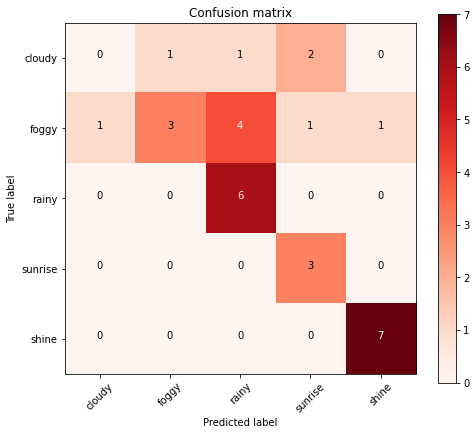

In [187]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix')
plt.show()

**Interpretation:**

From confusion matrix, we can interpret how many true positives did the model predict correctly for the 5 different classes.

- Cloudy - 0 out of 4 images were classified correctly.
- Foggy -  3 out of 10 images were classified correctly.
- rainy -  6 out of 6 images were classified correctly.
- sunrise -  3 out of 3 images were classified correctly.
- shine - 7 out of 7 images were classified correctly.




# **PART D - EPOCHS**

**Model 4** : In this model, we have changed the count of epochs in the base model from **'30' to '35'**, to check the model performance


Continued in different notebook,  
Deep_Learning_Assignment_Nikita_Gaurihar_002980962 Part B.ipynb

# **Part E -GRADIENT ESTIMATION:**

**Model 5** : In this model, we have changed the gradient estimation funtion of base model from 'Adam' to 'SGD', to check the model performance


In [104]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [105]:
img_width=256; img_height=256
batch_size=16

**Interpretation**:

* We have kept batch size = 16
* count of epochs = 30

In [106]:
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


**Interpretation**: Since our dataset has 5 different labels, we have taken mode as 'categorical'.


In [107]:
VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


**Interpretation**: Since our dataset has 5 different labels, we have taken mode as 'categorical'.


In [108]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_SGD_aug_best_weights.h5'
best_model5 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

**Interpretation:** We are saving our best model file here on drive.

### **We have changed the gradient estimation function from 'Adam' to 'SGD' here, again running the model to check the model accuracy -**

In [109]:
model_gradient = Sequential([
                             Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), 
                             MaxPooling2D(2, 2),
                             
                             Conv2D(32, (3, 3), activation='relu'), 
                             MaxPooling2D(2, 2),
                             
                             Conv2D(64, (3, 3), activation='relu'),
                             Conv2D(64, (3, 3), activation='relu'),
                             MaxPooling2D(2, 2),
                             
                             Conv2D(128, (3, 3), activation='relu'),
                             Conv2D(128, (3, 3), activation='relu'),
                             MaxPooling2D(2, 2),
                             
                             Conv2D(256, (3, 3), activation='relu'),
                             Conv2D(256, (3, 3), activation='relu'),
                             Conv2D(256, (3, 3), activation='relu'),
                             MaxPooling2D(2, 2),
                             
                             Flatten(),
                             
                             Dense(512, activation='relu'),
                             Dense(512, activation='relu'),
                             Dense(5, activation='softmax')
])
model_gradient.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 58, 58, 64)       

**Interpretation**: We can see that the output shows 5 output classes in the last 'dense_2' layer. That means,our model knows how to classify the images now.

In [110]:
model_gradient.compile(optimizer='SGD',                                          #Changed Adam to SGD
                       loss='categorical_crossentropy',
                       metrics =['accuracy'])

In [111]:
history_gradient = model_gradient.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model5]
                              )

Epoch 1/30
80/80 [==============================] - 26s 322ms/step - loss: 1.6045 - accuracy: 0.2480 - val_loss: 1.5969 - val_accuracy: 0.2345
Epoch 2/30
80/80 [==============================] - 26s 322ms/step - loss: 1.5831 - accuracy: 0.3564 - val_loss: 1.5568 - val_accuracy: 0.4204
Epoch 3/30
80/80 [==============================] - 26s 322ms/step - loss: 1.4395 - accuracy: 0.4207 - val_loss: 1.5571 - val_accuracy: 0.2920
Epoch 4/30
80/80 [==============================] - 26s 322ms/step - loss: 1.2446 - accuracy: 0.4309 - val_loss: 1.1510 - val_accuracy: 0.5973
Epoch 5/30
80/80 [==============================] - 26s 319ms/step - loss: 1.1619 - accuracy: 0.4796 - val_loss: 1.1389 - val_accuracy: 0.4690
Epoch 6/30
80/80 [==============================] - 26s 319ms/step - loss: 1.1170 - accuracy: 0.5243 - val_loss: 1.0334 - val_accuracy: 0.5487
Epoch 7/30
80/80 [==============================] - 26s 323ms/step - loss: 1.0780 - accuracy: 0.5463 - val_loss: 1.0544 - val_accuracy: 0.5973

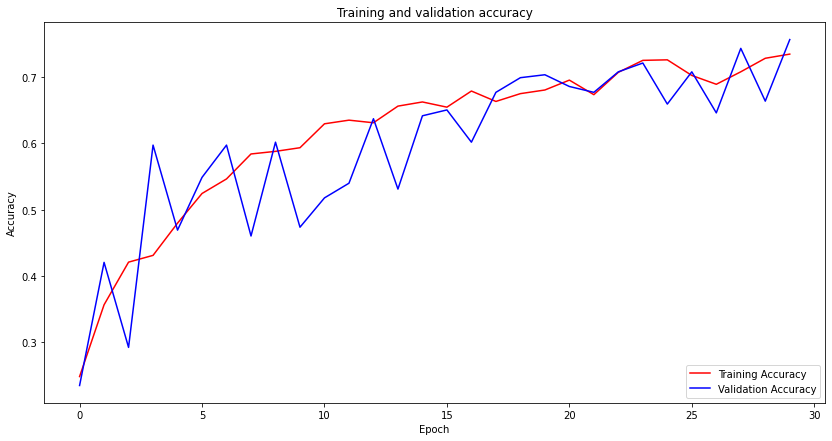

In [112]:
acc5=history_gradient.history['accuracy']
val_acc5=history_gradient.history['val_accuracy']
loss5=history_gradient.history['loss']
val_loss5=history_gradient.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc5, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc5, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

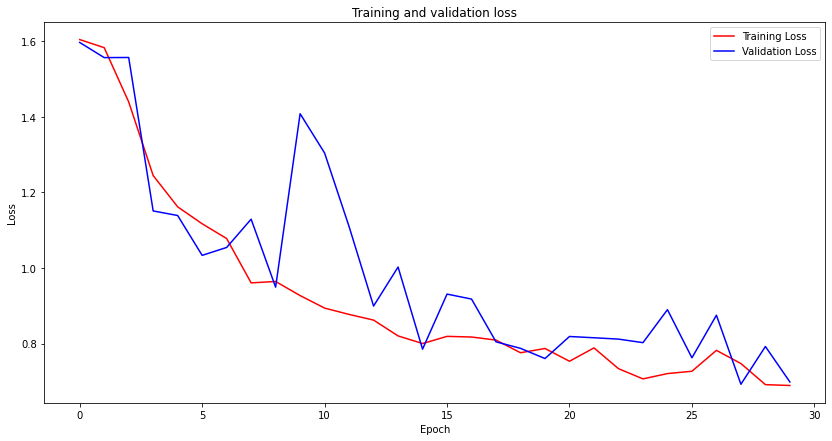

In [113]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss5, 'r', label="Training Loss")
plt.plot(epochs, val_loss5, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

**Interpretation:** From the above graphs, we can interpret that-

 - training accuracy = 0.7347
 - validation accuracy = 0.7566
 - training loss = 0.6890
 - validation loss =  0.6984

 This shows that the validation accuracy is higher and training loss is lower.



### **Checking performance on Test Data**

In [114]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [115]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [116]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 0s 3ms/step
[1 2 3 3 1 2 2 2 0 1 4 3 2 1 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [117]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [118]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

### **Classification report for base model is as follows-**

In [119]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[0, 1, 1, 2, 0],
       [1, 3, 4, 1, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])

In [120]:
train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

In [121]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

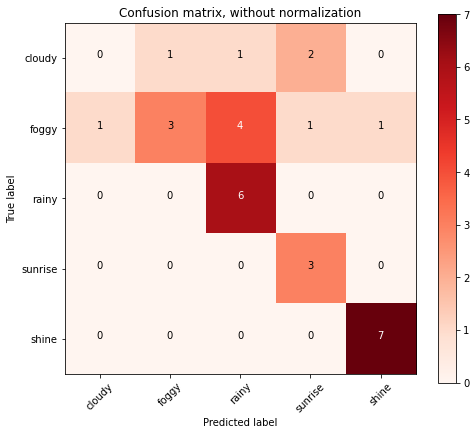

In [122]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

**Interpretation:**
From confusion matrix, we can interpret how many true positives did the model predict correctly for the 5 different classes.

- Cloudy - 0 out of 4 images were classified correctly.
- Foggy -  3 out of 10 images were classified correctly.
- rainy -  6 out of 6 images were classified correctly.
- sunrise -  3 out of 3 images were classified correctly.
- shine - 7 out of 7 images were classified correctly.





# **PART F - NETWORK ARCHITECHTURE:**

Model 6 : In this model, we have changed the Network Architechture to check the model performance


In [123]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [124]:
img_width=256; img_height=256
batch_size=16

**Interpretation:**

* We have kept batch size = 16
* count of epochs = 30

In [125]:
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


**Interpretation**: Since our dataset has 5 different labels, we have taken mode as 'categorical'.

In [126]:
VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


**Interpretation**: Since our dataset has 5 different labels, we have taken mode as 'categorical'.

In [127]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_netArch_aug_best_weights.h5'
best_model6 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

**Interpretation:**

We are saving our best model file here on drive.

### **We have changed the network architechture by changing the number of layers and size of layers and again running the model to check the model accuracy -**

In [128]:
model_netArch = Sequential([
                            Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), 
                            MaxPooling2D(2, 2),
                            
                            Conv2D(32, (3, 3), activation='relu'), 
                            Conv2D(32, (3, 3), activation='relu'),
                            MaxPooling2D(2, 2),
                            
                            Conv2D(64, (3, 3), activation='relu'),
                            Conv2D(64, (3, 3), activation='relu'),
                            Conv2D(64, (3, 3), activation='relu'),
                            MaxPooling2D(2, 2),
                            
                            Conv2D(128, (3, 3), activation='relu'),
                            Conv2D(128, (3, 3), activation='relu'),
                            Conv2D(128, (3, 3), activation='relu'),
                            MaxPooling2D(2, 2),
                            
                            
                            Flatten(),
                            
                            Dense(256, activation='relu'),
                            Dense(256, activation='relu'),
                            Dense(5, activation='softmax')
])
model_netArch.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 conv2d_47 (Conv2D)          (None, 123, 123, 32)      9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 59, 59, 64)       

**Interpretation**: We can see that the output shows 5 output classes in the last 'dense_2' layer. That means,our model knows how to classify the images now.

In [129]:
model_netArch.compile(optimizer='Adam', 
                      loss='categorical_crossentropy', 
                      metrics =['accuracy'])

In [130]:
history_netArch = model_netArch.fit_generator(train_generator,
                                              epochs=30,
                                              verbose=1,
                                              validation_data=validation_generator,
                                              callbacks = [best_model6]
                                              )

Epoch 1/30
80/80 [==============================] - 27s 329ms/step - loss: 1.5508 - accuracy: 0.2465 - val_loss: 1.3251 - val_accuracy: 0.4292
Epoch 2/30
80/80 [==============================] - 26s 325ms/step - loss: 1.2833 - accuracy: 0.4168 - val_loss: 1.1768 - val_accuracy: 0.4912
Epoch 3/30
80/80 [==============================] - 26s 321ms/step - loss: 1.0810 - accuracy: 0.5228 - val_loss: 0.9805 - val_accuracy: 0.5796
Epoch 4/30
80/80 [==============================] - 26s 321ms/step - loss: 0.9786 - accuracy: 0.5777 - val_loss: 0.9789 - val_accuracy: 0.5708
Epoch 5/30
80/80 [==============================] - 26s 324ms/step - loss: 0.9903 - accuracy: 0.5416 - val_loss: 0.9865 - val_accuracy: 0.5354
Epoch 6/30
80/80 [==============================] - 26s 324ms/step - loss: 0.8962 - accuracy: 0.5965 - val_loss: 0.9431 - val_accuracy: 0.6106
Epoch 7/30
80/80 [==============================] - 26s 316ms/step - loss: 0.8682 - accuracy: 0.6389 - val_loss: 1.0535 - val_accuracy: 0.6195

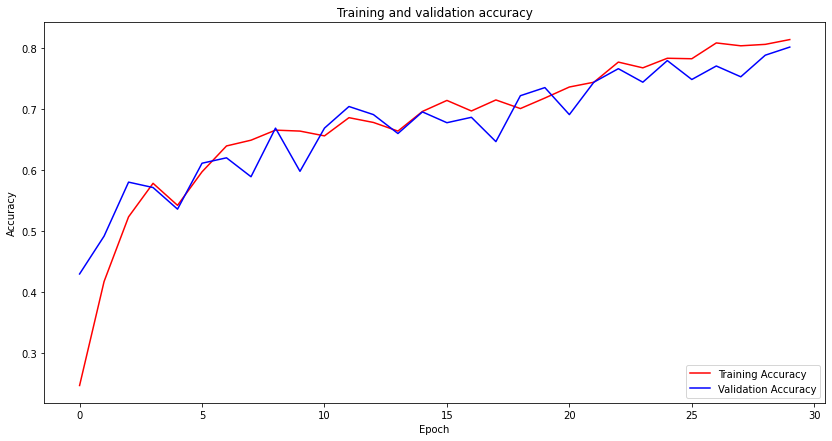

In [188]:
acc6=history_netArch.history['accuracy']
val_acc6=history_netArch.history['val_accuracy']
loss6=history_netArch.history['loss']
val_loss6=history_netArch.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc6, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc6, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

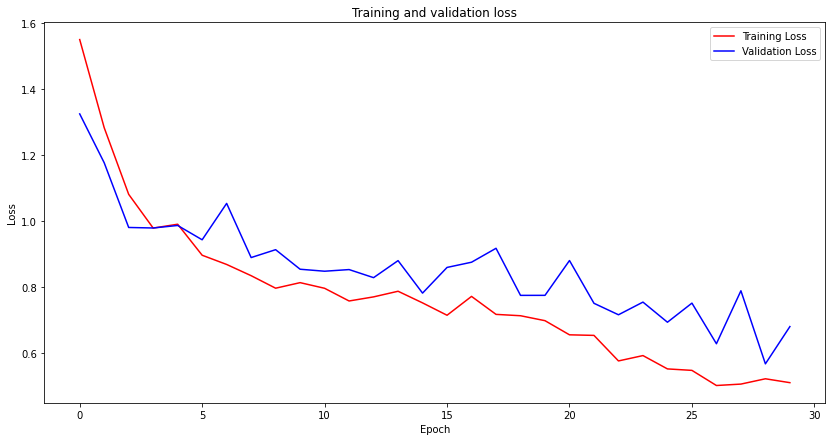

In [132]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss6, 'r', label="Training Loss")
plt.plot(epochs, val_loss6, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

**Interpretation:** From the above graphs, we can interpret that-
 
 - training accuracy = 0.8132
 - validation accuracy = 0.8009
 - training loss = 0.5094
 - validation loss =  0.6796

 This shows that the training model were trained better than validation as training accuracy is higher and training loss is lower.




### **Checking performance on Test Data**

In [133]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [134]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [135]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 0s 3ms/step
[1 2 3 3 1 2 2 2 0 1 4 3 2 1 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [136]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [137]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

### **Classification report for base model is as follows-**

In [138]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[0, 1, 1, 2, 0],
       [1, 3, 4, 1, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])

In [139]:
train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

In [140]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

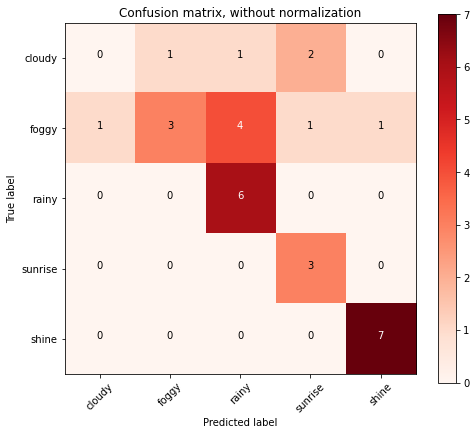

In [141]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

**Interpretation:**

From confusion matrix, we can interpret how many true positives did the model predict correctly for the 5 different classes.

- Cloudy - 0 out of 4 images were classified correctly.
- Foggy -  3 out of 10 images were classified correctly.
- rainy -  6 out of 6 images were classified correctly.
- sunrise -  3 out of 3 images were classified correctly.
- shine - 7 out of 7 images were classified correctly.





# **F. NETWORK INITIALIZATION:** 
**HeUniform class:**
Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / fan_in) (fan_in is the number of input units in the weight tensor).

In [142]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [143]:
img_width=256; img_height=256
batch_size=16

**Interpretation**:

We have kept batch size = 16
count of epochs = 30

In [144]:
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


In [145]:
VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


In [146]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_netArch_aug_best_weights.h5'
best_model7 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [148]:
keras.initializers.HeUniform(seed=None) 

In [151]:
initializer = keras.initializers.HeUniform()
layer = keras.layers.Dense(3, kernel_initializer=initializer)

In [152]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'ConstantV2',
 'GlorotNormal',
 'GlorotNormalV2',
 'GlorotUniform',
 'GlorotUniformV2',
 'HeNormal',
 'HeNormalV2',
 'HeUniform',
 'HeUniformV2',
 'Identity',
 'IdentityV2',
 'Initializer',
 'LOCAL',
 'LecunNormal',
 'LecunNormalV2',
 'LecunUniform',
 'LecunUniformV2',
 'Ones',
 'OnesV2',
 'Orthogonal',
 'OrthogonalV2',
 'RandomNormal',
 'RandomNormalV2',
 'RandomUniform',
 'RandomUniformV2',
 'TruncatedNormal',
 'TruncatedNormalV2',
 'VarianceScaling',
 'VarianceScalingV2',
 'Zeros',
 'ZerosV2',
 'constant',
 'deserialize',
 'generic_utils',
 'get',
 'glorot_normal',
 'glorot_normalV2',
 'glorot_uniform',
 'glorot_uniformV2',
 'he_normal',
 'he_normalV2',
 'he_uniform',
 'he_uniformV2',
 'identity',
 'init_ops',
 'initializer',
 'initializers_v1',
 'initializers_v2',
 'inspect',
 'keras_export',
 'lecun_normal',
 'lecun_normalV2',
 'lecun_uniform',
 'lecun_uniformV2',
 'normal',
 'one',
 'ones',
 'orthogonal',
 'populate_deserializable_objects',
 'random_normal',
 'rando

In [155]:
#random.set_seed(42)
np.random.seed(42)


In [156]:
model_initialization = Sequential([
                                   Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3), kernel_initializer="he_normal"), 
                                   MaxPooling2D(2, 2),
                                  
                                   Conv2D(32, (3, 3), activation='relu', kernel_initializer="he_normal"), 
                                   Conv2D(32, (3, 3), activation='relu', kernel_initializer="he_normal"),
                                   MaxPooling2D(2, 2),
                                  
                                   Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_normal"),
                                   Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_normal"),
                                   Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_normal"),
                                   MaxPooling2D(2, 2),
                                  
                                   Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_normal"),
                                   Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_normal"),
                                   Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_normal"),
                                   MaxPooling2D(2, 2),
                                  
                                  
                                   Flatten(),

                                
                                   Dense(300, activation='relu', kernel_initializer="he_normal"),   
                                   Dense(100, activation='relu', kernel_initializer="he_normal"),
                                
                                   Dense(5, activation='softmax')
])
model_initialization.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 conv2d_56 (Conv2D)          (None, 123, 123, 32)      9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 59, 59, 64)       

In [157]:


model_initialization.compile(optimizer='Adam',
                             loss='categorical_crossentropy',
                             metrics =['accuracy'])

In [158]:
history_modelinit = model_initialization.fit_generator(train_generator,
                                                     epochs=30,
                                                     verbose=1,
                                                     validation_data=validation_generator,
                                                     callbacks = [best_model7]
                                                     )

Epoch 1/30
80/80 [==============================] - 27s 328ms/step - loss: 1.4968 - accuracy: 0.4576 - val_loss: 1.0119 - val_accuracy: 0.5398
Epoch 2/30
80/80 [==============================] - 26s 325ms/step - loss: 0.9688 - accuracy: 0.5856 - val_loss: 0.9608 - val_accuracy: 0.6327
Epoch 3/30
80/80 [==============================] - 26s 329ms/step - loss: 0.9152 - accuracy: 0.6366 - val_loss: 1.2641 - val_accuracy: 0.4735
Epoch 4/30
80/80 [==============================] - 26s 327ms/step - loss: 0.9486 - accuracy: 0.6020 - val_loss: 0.9938 - val_accuracy: 0.5619
Epoch 5/30
80/80 [==============================] - 26s 327ms/step - loss: 0.8900 - accuracy: 0.6295 - val_loss: 0.9727 - val_accuracy: 0.6062
Epoch 6/30
80/80 [==============================] - 26s 322ms/step - loss: 0.8767 - accuracy: 0.6586 - val_loss: 0.9088 - val_accuracy: 0.5841
Epoch 7/30
80/80 [==============================] - 26s 321ms/step - loss: 0.7900 - accuracy: 0.6727 - val_loss: 0.9148 - val_accuracy: 0.6504

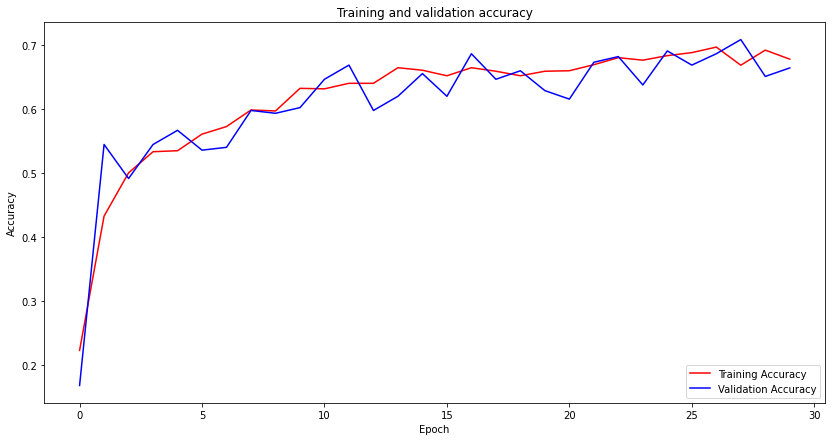

In [163]:
acc7=history_modelinit.history['accuracy']
val_acc7=history_modelinit.history['val_accuracy']
loss7=history_modelinit.history['loss']
val_loss7=history_modelinit.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

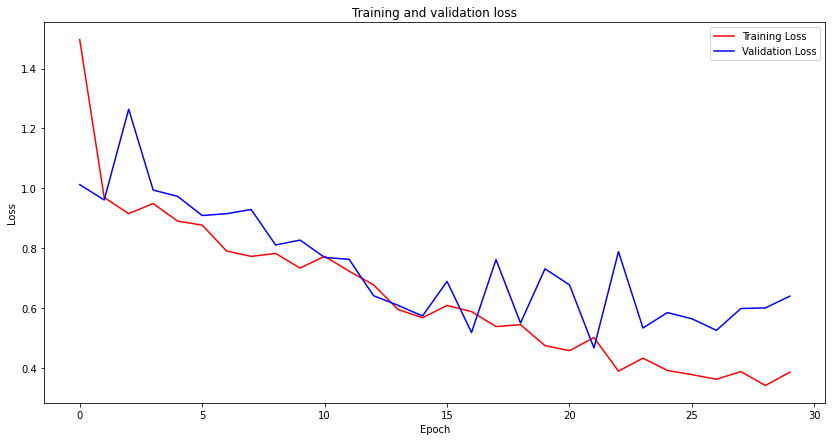

In [165]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss7, 'r', label="Training Loss")
plt.plot(epochs, val_loss7, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')



**Interpretation:** From the above graphs, we can interpret that- 
 - training accuracy = 0.8564
 - validation accuracy = 0.8319
 - training loss = 0.3853
 - validation loss =  0.6393

 This shows that the training model were trained better than validation as training accuracy is higher and training loss is lower.



In [166]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [167]:

# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [168]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 0s 3ms/step
[1 2 3 3 1 2 2 2 0 1 4 3 2 1 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [169]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [170]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [171]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[0, 1, 1, 2, 0],
       [1, 3, 4, 1, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])

In [172]:
train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

In [173]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

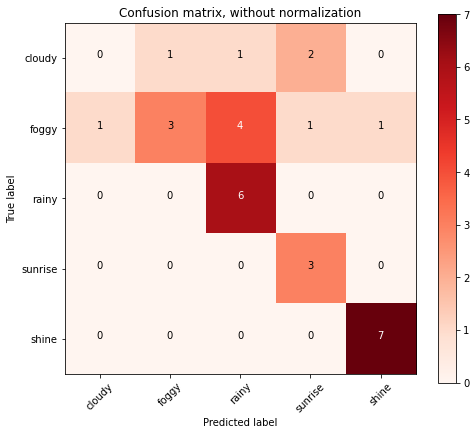

In [174]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

**Interpretation:** 

From confusion matrix, we can interpret how many true positives did the model predict correctly for the 5 different classes.

- Cloudy - 0 out of 4 images were classified correctly.
- Foggy -  3 out of 10 images were classified correctly.
- rainy -  6 out of 6 images were classified correctly.
- sunrise -  3 out of 3 images were classified correctly.
- shine - 7 out of 7 images were classified correctly.



# **Conclusion**:

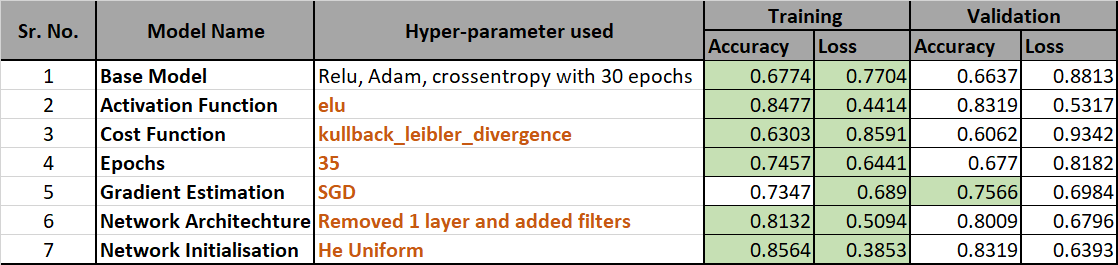

- **From the above table we can interprete that after hyper-parameter tuning on the base model with the gradient descent, the model is giving better accuracy and approximately similar loss.**

- **As compared to base model, the validation accuracy increased from 0.6637 to 0.7566** 

- **Whereas, As compared to base model, the validation loss decreased from 0.8813 to 0.6984**

## **References:**

1. https://adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/
2. https://cs.nju.edu.cn/wujx/paper/CNN.pdf
3. https://arxiv.org/pdf/1502.01852.pdf
4. https://keras.io/api/layers/initializers/#heuniform-class
5. https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78

The algorithms were referred directly from the keras official documentation. I also referred few youtube vedios to understand the deep learning concepts. Rest of the code was written independently.

Copyright 2021 Nikita Gaurihar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**